# Self-Driving Car Engineer Nanodegree

* **Project: Advanced Lane Line** 

* **Author:   Matt Kontz**

* **Start date:  January 29, 2019**



# Import Packages
Import package to be use throughout project notebook

In [1]:
#importing some useful packages
import os

import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

import numpy as np
import cv2

%matplotlib inline

# Camera Calibration

## Create list of Calibration Image Files

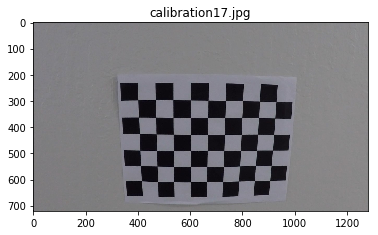

In [2]:
# Find calibration image names 
calImageNames = os.listdir("camera_cal/")

# print file names
# for fname in calImageNames:
#     print(fname)

k = 1
raw = mpimg.imread("./camera_cal/" + calImageNames[k])
plt.imshow(raw)
plt.title(calImageNames[k])

## Create List of Image and Object Points for Camera Calibration

* Create empty lists for object and image points
* Create object points once as this will be the same for all images
* Iterate through calibration images
    * load image
    * convert to grey scale
    * find corners (i.e. image points) using findChessboardCorners
    * if success append image and object points to list

Finding image points
    Added:  calibration7.jpg
    Added:  calibration17.jpg
    Added:  calibration14.jpg
    Failed: calibration4.jpg
    Added:  calibration8.jpg
    Added:  calibration6.jpg
    Added:  calibration9.jpg
    Added:  calibration15.jpg
    Added:  calibration19.jpg
    Added:  calibration18.jpg
    Added:  calibration3.jpg
    Added:  calibration10.jpg
    Added:  calibration16.jpg
    Failed: calibration5.jpg
    Failed: calibration1.jpg
    Added:  calibration11.jpg
    Added:  calibration12.jpg
    Added:  calibration13.jpg
    Added:  calibration2.jpg
    Added:  calibration20.jpg


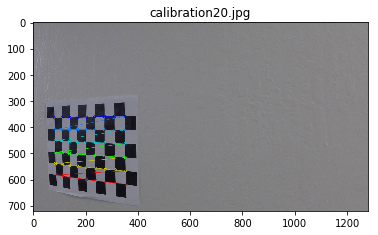

In [3]:
imgpoints = []
objpoints = []

objpnt = np.zeros((6*9,3), np.float32)
objpnt[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

print('Finding image points')
for fname in calImageNames:
    # load a calibration image
    raw_img = mpimg.imread("./camera_cal/" + fname)
    raw_plot = plt.imshow(raw_img)

    # convert to gray scale image
    gray = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
    #gray_plot = plt.imshow(gray)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    if ret:
        # if points are found then append to list of image and object points
        imgpoints.append(corners)
        objpoints.append(objpnt)
        print('    Added:  ' + fname)
    else:
        print('    Failed: ' + fname)
        
    # plot corners on chess board
    corner_lines_img = cv2.drawChessboardCorners(raw_img, (9, 6), corners, ret)
    plt.imshow (corner_lines_img)
    plt.title(fname)
    
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


## Verify Calibration on Sample Image

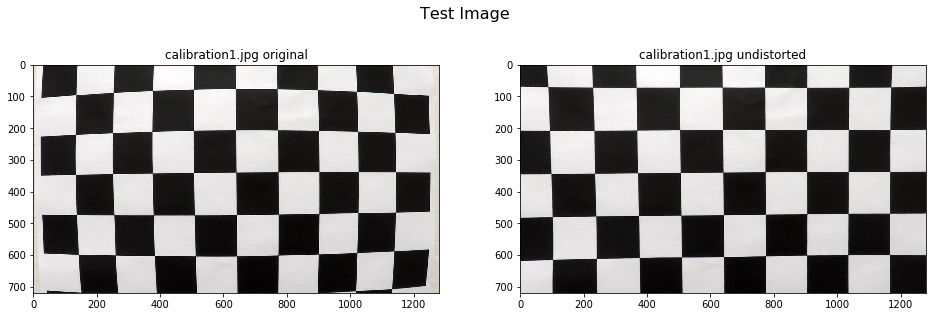

In [23]:
# load and plot Sample image
fname = 'calibration1.jpg'
sample_img = mpimg.imread("./camera_cal/" + fname)

dst = cv2.undistort(sample_img, mtx, dist, None, mtx)


# figure size in inches optional
rcParams['figure.figsize'] = 16, 5

fig, ax = plt.subplots(1,2)
fig.suptitle("Test Image", fontsize=16)

ax[0].imshow(sample_img)
ax[0].set_title(fname + ': original')
    
ax[1].imshow(dst)
ax[1].set_title(fname + ': undistorted')
